In [1]:
import pandas as pd

# Step 1: Read JSON
df = pd.read_json('bulkArticlesAugmented.json')

# Expand nested dictionaries into columns
normalized_df = pd.json_normalize(df['records'])

normalized_df.describe()

,contentType,identifier,language,url,title,creators,publicationName,doi,publisher,publisherName,...,onlineDate,coverDate,copyright,subjects,disciplines,key_issn,h_index,abstract.h1,abstract.p,printDate
count,25,25,25,25,25,25,25,25,25,25,...,25,24,25,25,25,25,25,25,25,8
unique,1,25,1,25,25,25,15,25,3,8,...,25,10,3,15,15,15,15,1,25,8
top,Article,doi:10.1038/s41598-025-05026-9,en,"[{'format': '', 'platform': '', 'value': 'http...",The usage of a transformer based and artificia...,"[{'creator': 'Zheng, Xiaofeng'}, {'creator': '...",Scientific Reports,10.1038/s41598-025-05026-9,Springer,Nature Publishing Group UK,...,2025-06-02,2025-12,©2024 The Author(s),"[Science, Humanities and Social Sciences, mult...","[{'id': '2887', 'term': 'Technology and Engine...",2045-2322,347,Abstract,The need for personalized and real-time feedba...,2025-05-28
freq,25,1,25,1,1,1,7,1,15,7,...,1,6,14,7,7,7,7,25,1,1


In [2]:
print(normalized_df.columns) 

Index(['contentType', 'identifier', 'language', 'url', 'title', 'creators',
       'publicationName', 'doi', 'publisher', 'publisherName',
       'publicationDate', 'publicationType', 'issn', 'eIssn', 'volume',
       'number', 'issueType', 'topicalCollection', 'genre', 'startingPage',
       'endingPage', 'journalId', 'openAccess', 'onlineDate', 'coverDate',
       'copyright', 'subjects', 'disciplines', 'key_issn', 'h_index',
       'abstract.h1', 'abstract.p', 'printDate'],
      dtype='object')


In [3]:
len(normalized_df)

25

In [4]:
normalized_df['language'].describe()

count     25
unique     1
top       en
freq      25
Name: language, dtype: object

In [5]:
normalized_df['publisher'].describe()

count           25
unique           3
top       Springer
freq            15
Name: publisher, dtype: object

In [6]:
normalized_df['h_index'] = normalized_df['h_index'].astype(int) 

normalized_df['h_index'].describe()

count      25.00000
mean      568.84000
std      1968.26958
min        31.00000
25%        81.00000
50%       138.00000
75%       347.00000
max      9999.00000
Name: h_index, dtype: float64

In [7]:
# 1. Remove rows where h_index == 9999 (invalid)
df_clean = normalized_df[normalized_df['h_index'] != 9999].copy()

print(f"The number of rows with invalid h_index that were removed: {len(normalized_df) - len(df_clean)}")

df_clean['h_index'].describe()

The number of rows with invalid h_index that were removed: 1


count     24.000000
mean     175.916667
std      122.438242
min       31.000000
25%       78.500000
50%      138.000000
75%      347.000000
max      347.000000
Name: h_index, dtype: float64

In [8]:
# 2. Calculate the median of the CLEANED h_index
median_h_index = df_clean['h_index'].median()

# 3. Filter for h_index > median
df_filtered = df_clean[df_clean['h_index'] > median_h_index]

print(df_filtered['h_index'].describe())

count     10.000000
mean     300.800000
std       78.526429
min      146.000000
25%      275.000000
50%      347.000000
75%      347.000000
max      347.000000
Name: h_index, dtype: float64


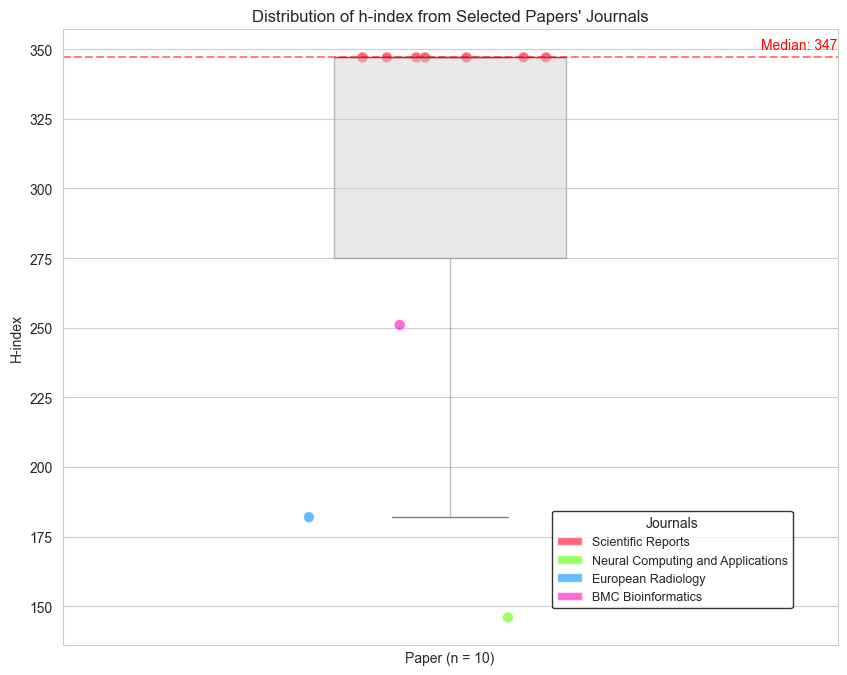

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Set style
sns.set_style("whitegrid")

# Create figure (keeping original size)
plt.figure(figsize=(10, 8))

# Set the random seed
np.random.seed(123)

# Add jitter (horizontal random spread)
jitter_amount = 0.075
x_jitter = np.random.normal(0, jitter_amount, size=len(df_filtered))

# Factorize journal names
labels, unique_names = pd.factorize(df_filtered['publicationName'])
n_journals = len(unique_names)

# Create boxplot
sns.boxplot(y=df_filtered['h_index'], 
            color='lightgray', 
            width=0.3,
            linewidth=1,
            showfliers=False,
            boxprops=dict(alpha=0.5),
            whiskerprops=dict(alpha=0.5),
            medianprops=dict(color='red', alpha=0.8)
           )

# Create scatter plot with gist_rainbow colors
plt.scatter(
    x_jitter,
    df_filtered['h_index'],
    c=labels,
    cmap='gist_rainbow',
    alpha=0.6,
    s=60,
    edgecolor='white',
    linewidth=0.5
)

# Add mean/median lines
median_val = df_filtered['h_index'].median()
plt.axhline(median_val, color='red', linestyle='--', alpha=0.5)

# Customize axes
plt.title("Distribution of h-index from Selected Papers' Journals")
plt.ylabel("H-index")
n = len(df_filtered)
plt.xlabel(f'Paper (n = {n})')
plt.yticks(fontsize=10)
plt.xticks([])
plt.xlim(-0.5, 0.5)

# Add median text (adjusted to avoid legend overlap)
plt.text(0.5, median_val+3, f'Median: {median_val:.0f}',  # Moved slightly lower
         color='red', ha='right', fontsize=10)

# Create legend for journals and place in bottom right
legend_elements = [Patch(facecolor=plt.cm.gist_rainbow(i/(n_journals-1)), 
                         label=name,
                         alpha=0.6)  # Match scatter plot alpha
                  for i, name in enumerate(unique_names)]

# Place legend in bottom right inside the plot
plt.legend(handles=legend_elements,
           title='Journals',
           loc='lower right',
           bbox_to_anchor=(0.95, 0.05),  # 0.95=right edge, 0.05=bottom
           frameon=True,
           framealpha=0.8,  # Semi-transparent background
           edgecolor='black',
           fontsize=9)  # Slightly smaller font

#plt.tight_layout()
plt.show()

In [10]:
df_filtered['onlineDate'] = pd.to_datetime(
    df_filtered['onlineDate'], 
    errors='coerce',  # Convert invalid dates to NaT
    format='%Y-%m-%d'  # Explicit format (adjust if needed)
)

df_filtered['onlineDate'].describe()

/var/folders/wk/60w0b9p96xdczkjqp6kd3th40000gn/T/ipykernel_56957/3883982727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['onlineDate'] = pd.to_datetime(


count                     10
mean     2025-02-25 19:12:00
min      2024-08-21 00:00:00
25%      2025-01-07 18:00:00
50%      2025-04-22 12:00:00
75%      2025-04-30 06:00:00
max      2025-06-02 00:00:00
Name: onlineDate, dtype: object

In [13]:
df_filtered['monthYear'] = df_filtered['onlineDate'].dt.strftime('%b%y')

/var/folders/wk/60w0b9p96xdczkjqp6kd3th40000gn/T/ipykernel_56957/1588193846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['monthYear'] = df_filtered['onlineDate'].dt.strftime('%b%y')


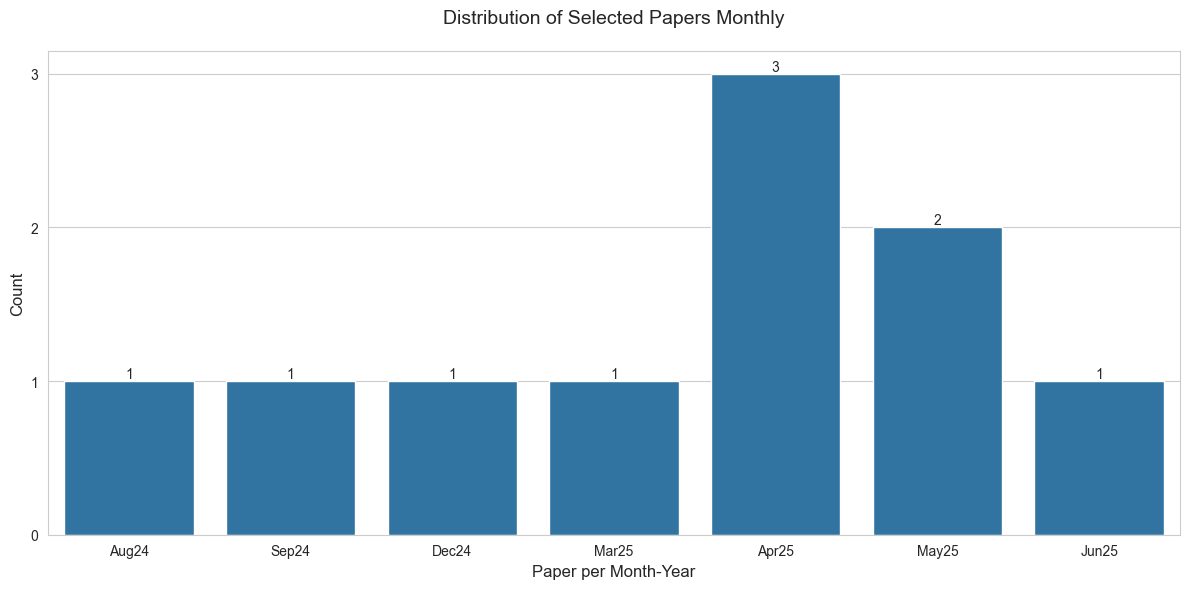

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure chronological order by sorting the DataFrame
df_sorted = df_filtered.sort_values('onlineDate')

# 2. Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_sorted,
    x='monthYear',
    order=df_sorted['monthYear'].unique(),  # Force chronological order
    #palette='viridis'  # Change color scheme if needed
)

# 3. Force y-ticks to increment by 1
max_count = df_sorted['monthYear'].value_counts().max()
plt.yticks(np.arange(0, max_count + 1, 1))  # 👈 Critical line

# 3. Customize the plot
plt.title('Distribution of Selected Papers Monthly', fontsize=14, pad=20)
plt.xlabel('Paper per Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
#plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# 4. Add value labels on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# 5. Adjust layout and display
plt.tight_layout()
plt.show()

In [15]:
with pd.option_context('display.max_colwidth', None):  # None means no limit
    print(df_filtered['title'])
    print(df_filtered['doi'])

0     The usage of a transformer based and artificial intelligence driven multidimensional feedback system in english writing instruction
2                    Transformers to the rescue: alleviating data scarcity in arabic grammatical error correction with pre-trained models
3                   Emotion-Aware RoBERTa enhanced with emotion-specific attention and TF-IDF gating for fine-grained emotion recognition
5                         Cross language transformation of free text into structured lobectomy surgical records from a multi center study
6                                                                       An LLM-based hybrid approach for enhanced automated essay scoring
7                                                                                        Industrial applications of large language models
10                                  Impact of hospital-specific domain adaptation on BERT-based models to classify neuroradiology reports
15                                

In [16]:
print(df_filtered[['h_index', 'monthYear', 'publicationName', 'key_issn']])

    h_index monthYear                    publicationName   key_issn
0       347     Jun25                 Scientific Reports  2045-2322
2       146     Apr25  Neural Computing and Applications  0941-0643
3       347     May25                 Scientific Reports  2045-2322
5       347     May25                 Scientific Reports  2045-2322
6       347     Apr25                 Scientific Reports  2045-2322
7       347     Apr25                 Scientific Reports  2045-2322
10      182     Mar25                 European Radiology  1432-1084
15      347     Dec24                 Scientific Reports  2045-2322
19      347     Sep24                 Scientific Reports  2045-2322
23      251     Aug24                 BMC Bioinformatics  1471-2105


In [18]:
# store the selected papers for further use
df_filtered.to_csv('selectedPapers.csv', index=False)